# assignment2

Fakhrurrozi (PYTN-KS14-018)

In [ ]:
import numpy as np 
import pandas as pd 
import statistics 
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import ttest_1samp
import scipy.stats as stats


import warnings

- BOROUGH : A digit code for the borough property is located in; in order these are Manhattan(1), Bronx(2), Brooklyn(3), Queens(4), and Staten Island(5).
- BLOCK; LOT : The combination of borough, block and lot forms unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE : The type of building at various points in time.

# import data

In [4]:
df = pd.read_csv("nyc-rolling-sales.csv    ")

In [5]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# eksplorasi data

In [6]:
df.shape

(84548, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
print(df.isnull().any())

Unnamed: 0                        False
BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool


In [9]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [10]:
df['SALE PRICE']

0         6625000
1             -  
2             -  
3         3936272
4         8000000
           ...   
84543      450000
84544      550000
84545      460000
84546    11693337
84547       69300
Name: SALE PRICE, Length: 84548, dtype: object

In [11]:
df = df.drop_duplicates()
sum(df.duplicated())

0

In [12]:
df.replace(' -  ', 0,  inplace=True)

In [13]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [14]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE_YEAR']= df['SALE DATE'].dt.year
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_YEAR
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633,6440,1900,2,C2,6625000,2017-07-19,2017
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,3,31,4616,18690,1900,2,C7,0,2016-12-14,2016
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1,17,2212,7803,1900,2,C7,0,2016-12-09,2016
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272,6794,1913,2,C4,3936272,2016-09-23,2016
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369,4615,1900,2,C2,8000000,2016-11-17,2016


In [15]:
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['SALE_MONTH']= df['SALE DATE'].dt.month
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_YEAR,SALE_MONTH
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,1633,6440,1900,2,C2,6625000,2017-07-19,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,31,4616,18690,1900,2,C7,0,2016-12-14,2016,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,17,2212,7803,1900,2,C7,0,2016-12-09,2016,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,2272,6794,1913,2,C4,3936272,2016-09-23,2016,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,2369,4615,1900,2,C2,8000000,2016-11-17,2016,11


In [16]:
df[['YEAR_BUILT','TAX_CLASS','BUILD_CATEGORY']] = df[['YEAR BUILT','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT TIME OF SALE']]
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,SALE_YEAR,SALE_MONTH,YEAR_BUILT,TAX_CLASS,BUILD_CATEGORY
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,1900,2,C2,6625000,2017-07-19,2017,7,1900,2,C2
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,1900,2,C7,0,2016-12-14,2016,12,1900,2,C7
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,1900,2,C7,0,2016-12-09,2016,12,1900,2,C7
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,1913,2,C4,3936272,2016-09-23,2016,9,1913,2,C4
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,1900,2,C2,8000000,2016-11-17,2016,11,1900,2,C2


In [17]:
df['BUILD_CATEGORY'] = df['BUILD_CATEGORY'].astype('str')

In [18]:
df[['SALE_PRICE', 'TOTAL_UNITS']] = df[['SALE PRICE', 'TOTAL UNITS']].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  int64         
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83783 non-null  object        
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   EASE-MENT                       83783 non-null  object        
 7   BUILDING CLASS AT PRESENT       83783 non-null  object        
 8   ADDRESS                         83783 non-null  object        
 9   APARTMENT NUMBER                83783 non-null  object        
 10  ZIP CODE                        83783 non-null  int64         
 11  RE

In [20]:
dx = df[['TOTAL_UNITS', 'BUILD_CATEGORY']]

Mean

Mean groupby Sale year

In [21]:
df[['TOTAL_UNITS', 'SALE_PRICE', 'SALE_YEAR']].groupby(['SALE_YEAR']).\
    agg(mean_units = ('TOTAL_UNITS', 'mean'), mean_price = ('SALE_PRICE', 'mean'))

,mean_units,mean_price
SALE_YEAR,,
2016,2.510001,1.077664e+06
2017,2.054496,1.056687e+06


In [22]:
a = df['TOTAL_UNITS']
b = df['SALE_PRICE']

In [23]:
mean_p = statistics.mean(b)
mean_u = statistics.mean(a)
print("Price mean : ",mean_p)
print("Units mean : ",mean_u)

Price mean :  1064009.3305563182
Units mean :  2.213503932778726


Median 

Median groupby Sale year

In [24]:
df[['TOTAL_UNITS', 'SALE_PRICE', 'SALE_YEAR']].groupby(['SALE_YEAR']).\
    agg(median_units = ('TOTAL_UNITS', 'median'), median_price = ('SALE_PRICE', 'median'))

,median_units,median_price
SALE_YEAR,,
2016,1.0,375000.0
2017,1.0,440000.0


In [25]:
median_p = statistics.median(b)
median_u = statistics.median(a)
print("Price median : ",median_p)
print("Units median : ",median_u)

Price median :  420000.0
Units median :  1.0


Modus

In [26]:
mode_p = statistics.mode(b)
mode_u = statistics.mode(a)
print("Price mode : ",mode_p)
print("Units mode : ",mode_u)

Price mode :  0.0
Units mode :  1.0


Range

In [27]:
range_units = np.ptp(a)
range_price = np.ptp(b)
print("Range units : ",range_units)
print("Range price : ",range_price)

Range units :  2261.0
Range price :  2210000000.0


Variance

In [28]:
variance_units = statistics.variance(a)
variance_price = statistics.variance(b)
print("Variance units : ",variance_units)
print("Variance price : ",variance_price)

Variance units :  352.6030274002823
Variance price :  108777134316316.67


Standard Deviation

In [33]:
std_units = statistics.stdev(a)
std_price = statistics.stdev(b)
print("Standard Deviation of units : ",std_units)
print("Standard Deviation of price : ",std_price)

Standard Deviation of units :  18.777726896519777
Standard Deviation of price :  10429627.717052832


Probability Distribution

In [39]:
[mean_fit, std_fit] = stats.norm.fit(b)
print(mean_fit)
print(std_fit)

1064009.3305563182
10429565.474958146


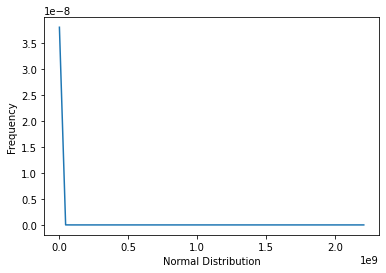

In [41]:
x = np.linspace(np.min(b), np.max(b))
plt.plot(x, stats.norm.pdf(x, mean_fit, std_fit))
plt.xlabel("Normal Distribution")
plt.ylabel("Frequency")
plt.show()

In [44]:

mean_fit, std_fit = stats.norm.fit(a)
print(mean_fit)
print(std_fit)

2.213503932778726
18.777614834508828


Text(0, 0.5, 'Frequency')

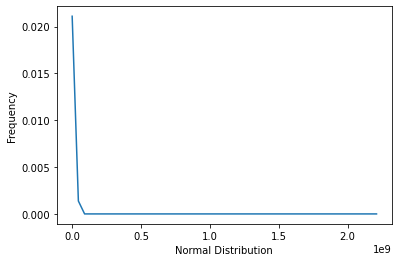

In [45]:
v = np.linspace(np.min(a), np.max(a))
plt.plot(x, stats.norm.pdf(v, mean_fit, std_fit))
plt.xlabel("Normal Distribution")
plt.ylabel("Frequency")

Confidence Intervals

In [46]:
price_data = np.random.normal(b)

price_data_mean = np.mean(price_data)
price_data_std = np.std(price_data, ddof=1)

n = len(price_data)
conf_level = 0.95
t_value = stats.t.ppf((1 + conf_level) / 2, n - 1)
price_lower, price_upper = stats.t.interval(conf_level, n - 1, loc=price_data_mean, scale=price_data_std / np.sqrt(n))

In [47]:
print(f"Sample Mean: {price_data_mean:.2f}")
print(f"Standard Deviation: {price_data_std:.2f}")
print(f"95% Confidence Interval: [{price_lower:.2f}, {price_upper:.2f}]")

Sample Mean: 1064009.32
Standard Deviation: 10429627.72
95% Confidence Interval: [993386.48, 1134632.17]


In [48]:
units_data = np.random.normal(a)

units_data_mean = np.mean(units_data)
units_data_std = np.std(units_data, ddof=1)

n = len(units_data)
conf_level = 0.95
t_value = stats.t.ppf((1 + conf_level) / 2, n - 1)
units_lower, units_upper = stats.t.interval(conf_level, n - 1, loc=units_data_mean, scale=units_data_std / np.sqrt(n))

In [49]:
print(f"Sample Mean: {units_data_mean:.2f}")
print(f"Standard Deviation: {units_data_std:.2f}")
print(f"95% Confidence Interval: [{units_lower:.2f}, {units_upper:.2f}]")

Sample Mean: 2.21
Standard Deviation: 18.81
95% Confidence Interval: [2.08, 2.33]


Hypotesis Testing

1. Is there a difference unit sold beetwen property built 1900 - 2000 and 2001 so on?

Property in NYC is divided into 4 tax classes:
- Class 1: Most residential property of up to three units (family homes and small stores or offices with one or two apartments attached), and most condominiums that are not more than three stories.
- Class 2: All other property that is not in Class 1 and is primarily residential (rentals, cooperatives and condominiums).
- Class 3: Most utility property.
- Class 4: All commercial and industrial properties, such as office, retail, factory buildings and all other properties not included in tax classes 1, 2 or 3.

- H0 : there is no difference property sold beetwen 1900 - 2017
- Ha : one of the years are difference from the others

In [50]:
y_1900 = df[df["YEAR BUILT"] == 1900]
y_1901 = df[df["YEAR BUILT"] == 1901]

In [51]:
len_1900 = len(y_1900)
len_1901 = len(y_1901)
year_1900 = df.TAX_CLASS[df.YEAR_BUILT == 1900]
year_1901 = df.TAX_CLASS[df.YEAR_BUILT == 1901]

In [52]:
print("lenght 1900 :",len_1900,"Average :",year_1900.mean(), "std :",year_1900.std())
print("lenght 1901 :",len_1901,"Average :",year_1901.mean(), "std :",year_1901.std())

lenght 1900 : 1121 Average : 2.104371097234612 std : 0.6100267716780006
lenght 1901 : 1745 Average : 1.087679083094556 std : 0.34831269258479036


In [53]:
sm.stats.ztest(y_1900["TAX_CLASS"],y_1901["TAX_CLASS"],alternative='two-sided')

(56.70604450538876, 0.0)

Jika nilai p-value yang kecil ditemukan dalam analisis dua sampel, maka kita dapat menolak hipotesis null. Dalam konteks ini, artinya terdapat perbedaan signifikan antara jenis tipe kelas properti yang terjual dari tahun 1900-2017.

2. Is there a difference in unit sold based on building category?
- H0 : there is one building category sold 
- Ha : more than one category has been sold

In [54]:
category1 = df[df["BUILD_CATEGORY"] == 'C2']
category2 = df[df["BUILD_CATEGORY"] == 'A1']

In [55]:
len_category1 = len(category1)
len_category2 = len(category2)
category_1 = df.TOTAL_UNITS[df.BUILD_CATEGORY == 'C2']
category_2 = df.TOTAL_UNITS[df.BUILD_CATEGORY == 'A1']

In [56]:
print("lenght category1 :",len_category1,"Average :",category_1.mean(), "std :",category_1.std())
print("lenght category2 :",len_category2,"Average :",category_2.mean(), "std :",category_2.std())

lenght category1 : 801 Average : 5.807740324594257 std : 0.39432221911071214
lenght category2 : 6700 Average : 1.002089552238806 std : 0.1360362397541158


In [57]:
sm.stats.ztest(category1["TOTAL_UNITS"],category2["TOTAL_UNITS"],alternative='two-sided')

(706.3252394386265, 0.0)

Berdasarkan dua sample yang digunakan, menghasilkan nilai p-value yang kecil maka Null hypothesis dapat ditolak, berdasarkan dari dua sampel yang diambel bangunan yang terjual lebih dari satu kategori

3. What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?
- H0 : there is no difference in the market transaction from 2016-2017
- Ha : there is a difference in the market transaction from 2016-2017

In [58]:
y_2016 = df[df["SALE_YEAR"] == 2016]
y_2017 = df[df["SALE_YEAR"] == 2017]

In [59]:
len_2016 = len(y_2016)
len_2017 = len(y_2017)
year_2016 = df.SALE_PRICE[df.SALE_YEAR == 2016]
year_2017 = df.SALE_PRICE[df.SALE_YEAR == 2017]

In [60]:
print("lenght 2016 :",len_2016,"Average :",year_2016.mean(), "std :",year_2016.std())
print("lenght 2017 :",len_2017,"Average :",year_2017.mean(), "std :",year_2017.std())

lenght 2016 : 29247 Average : 1077663.514890416 std : 7864112.607816467
lenght 2017 : 54536 Average : 1056686.7559410299 std : 11573595.28062997


In [62]:
sm.stats.ztest(y_2016["TAX_CLASS"],y_2017["TAX_CLASS"],alternative='two-sided')

(2.886792385944539, 0.0038919094763811605)

Jika nilai p-value yang kecil ditemukan dalam analisis dua sampel, maka kita dapat menolak hipotesis nulll. Dalam data ini, hal itu menunjukkan adanya tren yang signifikan dalam data transaksi real estate New York. Secara spesifik, jumlah transaksi pada tahun 2017 terbukti lebih banyak daripada pada tahun 2016.